In [ ]:
# To install any libraries 
# py -m pip install <<libray Name>>

In [1]:
# import pandas lib as pd
import pandas as pd
pd.set_option("display.precision", 2)
df1 = pd.read_csv(r'C:\Users\dpandian\Documents\DataForDS.csv')
# Get Row count of the DF
count_row = df1.shape[0]  # Gives number of rows
count_col = df1.shape[1]  # Gives number of columns

In [2]:
df1.rename(
    columns={
        "timestamp": "Time",
        "agent.name": "host", 
        "rule.firedtimes": "firedtimes",
        "rule.description": "description",
        "rule.level": "rulelevel",
        "rule.nist_800_53":"nist800",
        "location":"location",
        "rule.mitre.tactic":"mitretactic",
        "rule.mitre.technique":"mitretechnique"
    },
    errors="raise",
    inplace=True
)

In [3]:
# timezone must be a valid pytz timezone string
import pytz
timezone = 'US/Eastern'
tz = pytz.timezone(timezone)
# Convert the strings in the Time column to datetime objects, make them time-zone aware, change the timezone to Eastern, then reformat them as new string
df1['Time'] = df1['Time']\
    .astype('datetime64[ns]')\
    .dt.tz_localize('UTC')\
    .dt.tz_convert(timezone)\
    .dt.strftime("%b %d, %Y @ %H:%M:%S")

In [4]:
# timezone must be a valid pytz timezone string
timezone = 'US/Eastern'
tz = pytz.timezone(timezone)
 # Set rule level range for ES query
min_rule_level = 0
max_rule_level = 21


In [5]:
# Minimum rule fired times to filter out infrequent events
min_firedtimes = 0
 # Set rule level range for ES query
min_rule_level = 0
max_rule_level = 21
# Set age of data to pull as of the current time
MAX_EVENT_AGE_SECONDS = 0
MAX_EVENT_AGE_MINUTES = 0
MAX_EVENT_AGE_HOURS = 1
MAX_EVENT_AGE_DAYS = 0
from datetime import datetime, timedelta
# Convert the times to the correct date in the past
start_datetime = datetime.now() - \
    timedelta(
        days=MAX_EVENT_AGE_DAYS,
        hours=MAX_EVENT_AGE_HOURS,
        minutes=MAX_EVENT_AGE_MINUTES,
        seconds=MAX_EVENT_AGE_SECONDS,
)
    

In [6]:
# Print total records found
caption = "Query found " + str(count_row) + " results " + \
      "fired at least " + str(min_firedtimes) + " times " + \
      "between '" + tz.fromutc(start_datetime).strftime("%d %b %Y, %H:%M") + "' and '" + tz.fromutc(datetime.now()).strftime("%d %b %y, %H:%M") + "' " +\
      timezone + " " + \
      "with rule levels ranging from " + str(min_rule_level) + " through " + str(max_rule_level)
print(caption)

Query found 486 results fired at least 0 times between '26 Jul 2023, 04:40' and '26 Jul 23, 05:40' US/Eastern with rule levels ranging from 0 through 21


In [7]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
fig = ff.create_table(df1, height_constant=60)
fig.show()

In [8]:
left_aligned_df = df1.style.set_properties(**{'text-align': 'left'})
 
left_aligned_df = left_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
# Show the dataframe
display(left_aligned_df)

,host,firedtimes,description,Time,rulelevel,nist800,location,mitretactic,mitretechnique,Count
0,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AC.6,EventChannel,Defense Evasion,Valid Accounts,1
1,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AC.6,EventChannel,Initial Access,Valid Accounts,1
2,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AC.6,EventChannel,Persistence,Valid Accounts,1
3,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AC.6,EventChannel,Privilege Escalation,Valid Accounts,1
4,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AU.14,EventChannel,Defense Evasion,Valid Accounts,1
5,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AU.14,EventChannel,Initial Access,Valid Accounts,1
6,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AU.14,EventChannel,Persistence,Valid Accounts,1
7,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 09:17:37",4,AU.14,EventChannel,Privilege Escalation,Valid Accounts,1
8,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 10:00:01",4,AC.6,EventChannel,Defense Evasion,Valid Accounts,1
9,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 10:00:01",4,AC.6,EventChannel,Initial Access,Valid Accounts,1


In [18]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   host            486 non-null    object
 1   firedtimes      486 non-null    int64 
 2   description     486 non-null    object
 3   Time            486 non-null    object
 4   rulelevel       486 non-null    int64 
 5   nist800         486 non-null    object
 6   location        486 non-null    object
 7   mitretactic     486 non-null    object
 8   mitretechnique  486 non-null    object
 9   Count           486 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 38.1+ KB
None


In [19]:
df1.describe()

,firedtimes,rulelevel,Count
count,486.00,486.00,486.00
mean,3.45,4.85,1.01
std,2.00,3.28,0.16
min,1.00,3.00,1.00
25%,2.00,3.00,1.00
50%,3.00,4.00,1.00
75%,4.00,4.00,1.00
max,9.00,13.00,3.00


In [ ]:
df1.describe(include=["object", "bool"])

,host,description,Time,nist800,location,mitretactic,mitretechnique
count,486,486,486,486,486,486,486
unique,2,5,82,6,3,5,3
top,HarrysLaptop,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 15:00:01.179",AU.14,EventChannel,Defense Evasion,Valid Accounts
freq,420,200,24,222,400,166,400


In [9]:
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x="firedtimes", hue="rulelevel", data=df1);

AttributeError: type object 'CommManager' has no attribute 'class_traits'

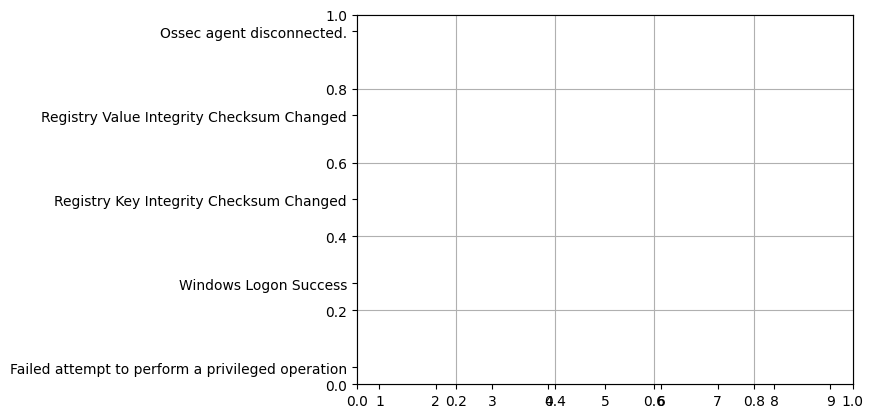

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
x=df1["firedtimes"]
y= df1["description"]
plt.plot(x,y)
ax = plt.axes()
plt.grid()
plt.show()

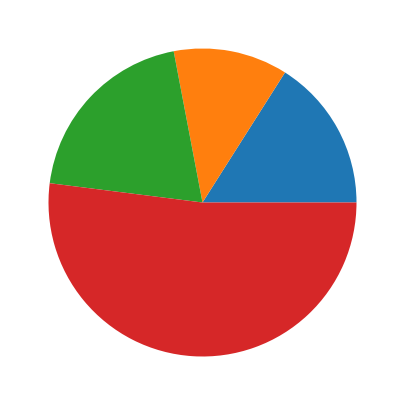

In [25]:
x = df1["rulelevel"].unique()
fig = plt.figure(figsize=(9, 5))
plt.pie(x)
plt.show()

In [26]:
#Tensorflow coding Testing
df1.head()

,host,firedtimes,description,Time,rulelevel,nist800,location,mitretactic,mitretechnique,Count
0,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 14:17:37.180",4,AC.6,EventChannel,Defense Evasion,Valid Accounts,1
1,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 14:17:37.180",4,AC.6,EventChannel,Initial Access,Valid Accounts,1
2,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 14:17:37.180",4,AC.6,EventChannel,Persistence,Valid Accounts,1
3,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 14:17:37.180",4,AC.6,EventChannel,Privilege Escalation,Valid Accounts,1
4,HarrysLaptop,1,Failed attempt to perform a privileged operation,"Nov 29, 2022 @ 14:17:37.180",4,AU.14,EventChannel,Defense Evasion,Valid Accounts,1


In [ ]:
import numpy as np
# In the original dataset Rules >5 "4" indicates the pet was not adopted.
df1['target'] = np.where(df1['rulelevel']<=15, 0, 1)
len(df1), len(df1.columns)

(486, 11)

<AxesSubplot: ylabel='Density'>

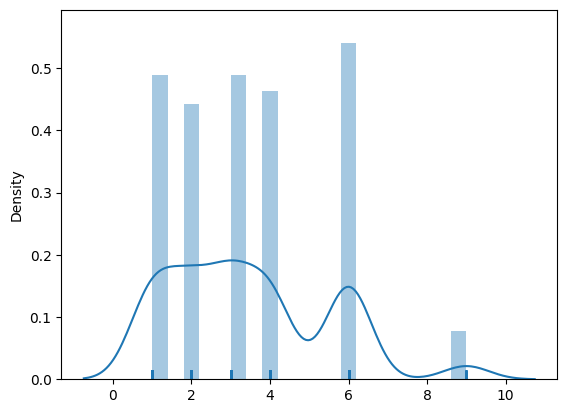

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(x=df1.firedtimes, bins=20, kde=True, rug=True)

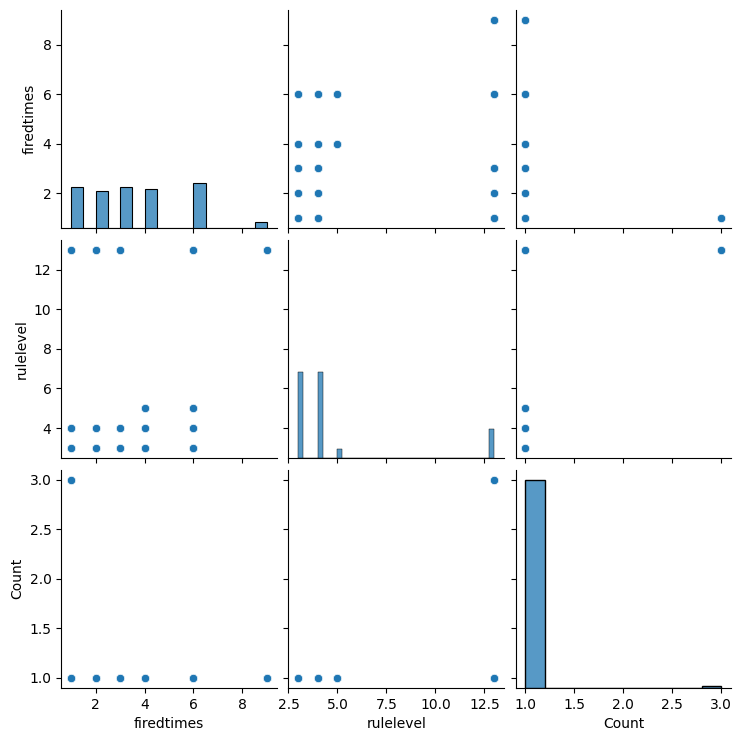

In [27]:
sns.pairplot(df1)

In [20]:
"""Bokeh Visualization Template

This template is a general outline for turning your data into a 
visualization using Bokeh.
"""
# Data handling
import pandas as pd
import numpy as np

# Bokeh libraries
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

# Prepare the data

# Determine where the visualization will be rendered
output_file('filename2.html')  # Render to static HTML, or 
output_notebook()  # Render inline in a Jupyter Notebook

# Set up the figure(s)
fig = figure()  # Instantiate a figure() object

# Connect to and draw the data

# Organize the layout

# Preview and save 
show(fig)  # See what I made, and save if I like it

ImportError: cannot import name 'Tabs' from 'bokeh.models.widgets' (c:\Users\dpandian\AppData\Local\Programs\Python\Python39\lib\site-packages\bokeh\models\widgets\__init__.py)

In [2]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RadioButtonGroup

output_file("radio_button_group.html")

radio_button_group = RadioButtonGroup(
        labels=["Option 1", "Option 2", "Option 3"], active=0)

show(widgetbox(radio_button_group))

ImportError: cannot import name 'widgetbox' from 'bokeh.layouts' (c:\Users\dpandian\AppData\Local\Programs\Python\Python39\lib\site-packages\bokeh\layouts.py)

In [12]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), width=400, height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase = Slider(start=-6.4, end=6.4, value=0, step=.1, title="Phase")
offset = Slider(start=-9, end=9, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp, freq=freq, phase=phase, offset=offset),
                    code="""
    const A = amp.value
    const k = freq.value
    const phi = phase.value
    const B = offset.value

    const x = source.data.x
    const y = Array.from(x, (x) => B + A*Math.sin(k*x+phi))
    source.data = { x, y }
""")

amp.js_on_change('value', callback)
freq.js_on_change('value', callback)
phase.js_on_change('value', callback)
offset.js_on_change('value', callback)

show(row(plot, column(amp, freq, phase, offset)))

In [17]:
from bokeh.layouts import column
from bokeh.models import (ColumnDataSource, DataTable, HoverTool, IntEditor,
                          NumberEditor, NumberFormatter, SelectEditor,
                          StringEditor, StringFormatter, TableColumn)
from bokeh.plotting import figure, show


host = sorted(df1["host"].unique())
firedtimes = sorted(df1["firedtimes"].unique())
description = sorted(df1["description"].unique())
rulelevel = sorted(df1["rulelevel"].unique())
nist800 = sorted(df1["nist800"].unique())

columns1 = [
    TableColumn(field="host", title="Host",
                editor=SelectEditor(options=host),
                formatter=StringFormatter(font_style="bold")),
    TableColumn(field="description", title="Description",
                editor=StringEditor(completions=description)),
    TableColumn(field="rulelevel", title="Rulelevel",
                editor=NumberEditor(step=0.1), formatter=NumberFormatter(format="0.0")),    
    TableColumn(field="nist800", title="Nist800",
                editor=SelectEditor(options=nist800)),    
]
data_table1 = DataTable(source=source, columns=columns1, editable=True, width=800,
                       index_position=-1, index_header="row index", index_width=60)

p1 = figure(width=800, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag="xbox_select")

host = p1.circle(x="index", y="host", fill_color="#396285", size=8, alpha=0.5, source=source)
rulelevel = p1.circle(x="index", y="rulelevel", fill_color="#CE603D", size=8, alpha=0.5, source=source)

tooltips = [
    ("Host", "@host"),
    ("Firedtimes", "@firedtimes"),
    ("Rulelevel", "@rulelevel"),
    ("Nist800", "@nist800"),
]
host_hover_tool = HoverTool(renderers=[host], tooltips=tooltips + [("Agent Name", "@host")])
rule_hover_tool = HoverTool(renderers=[rulelevel], tooltips=tooltips + [("Rule Level", "@rulelevel")])

p1.add_tools(host_hover_tool, rule_hover_tool)
#reset_output()
show(column(p1, data_table1))

RuntimeError: Models must be owned by only a single document, ColumnDataSource(id='p1001', ...) is already in a doc

In [19]:
from bokeh.layouts import column
from bokeh.models import (ColumnDataSource, DataTable, HoverTool, IntEditor,
                          NumberEditor, NumberFormatter, SelectEditor,
                          StringEditor, StringFormatter, TableColumn)
from bokeh.plotting import figure, show


host = sorted(df1["host"].unique())
firedtimes = sorted(df1["firedtimes"].unique())
description = sorted(df1["description"].unique())
rulelevel = sorted(df1["rulelevel"].unique())
nist800 = sorted(df1["nist800"].unique())

columns1 = [
    TableColumn(field="host", title="Host",
                editor=SelectEditor(options=host),
                formatter=StringFormatter(font_style="bold")),
    TableColumn(field="description", title="Description",
                editor=StringEditor(completions=description)),
    TableColumn(field="rulelevel", title="Rulelevel",
                editor=NumberEditor(step=0.1), formatter=NumberFormatter(format="0.0")),    
    TableColumn(field="nist800", title="Nist800",
                editor=SelectEditor(options=nist800)),    
]
data_table1 = DataTable(source=source, columns=columns1, editable=True, width=800,
                       index_position=-1, index_header="row index", index_width=60)

p1 = figure(width=800, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag="xbox_select")

host = p1.circle(x="index", y="host", fill_color="#396285", size=8, alpha=0.5, source=source)
rulelevel = p1.circle(x="index", y="rulelevel", fill_color="#CE603D", size=8, alpha=0.5, source=source)

p1 = figure(width=800, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag="xbox_select")

host = p1.circle(x="index", y="host", fill_color="#396285", size=8, alpha=0.5, source=source)
rulelevel = p1.circle(x="index", y="rulelevel", fill_color="#CE603D", size=8, alpha=0.5, source=source)

p1.add_tools(host_hover_tool, rule_hover_tool)
output_file('fert_lit.html')


x = [1,2,3,4,5]
y = [8,6,5,2,3]
plot = figure(plot_height=30)
plot.line(x, y, line_width=3)
# output_file('line.html')
show(plot)


AttributeError: unexpected attribute 'plot_height' to figure, similar attributes are outer_height, height or min_height